In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputRegressor
from sklearn import metrics 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold, RepeatedKFold

from sklearn.base import clone
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer

In [2]:
path=r'/home/ludovico/ML-project/data/cup/ML-CUP23-'
train_set = pd.read_csv(path+'TR.csv',skiprows=7, header=None, delimiter=',', dtype=str)

input=train_set[train_set.columns[1:-3]]
target=train_set[train_set.columns[-3:]]


In [3]:
x_train, x_test, y_train, y_test = train_test_split(input, target, test_size=0.2, random_state=0, shuffle=True)

x=np.array(y_test[11].astype(np.float64))
y=np.array(y_test[12].astype(np.float64))
z=np.array(y_test[13].astype(np.float64))


In [36]:
def MEE(actual, predict):
    return np.mean(np.linalg.norm(actual - predict, axis=1))

#make_scorer(MEE, greater_is_better=False)

n_neigh=np.arange(1,30,1)
parameters_KNN = {
    'n_neighbors': n_neigh,
    'weights': ('uniform','distance'),
    'metric': ('l1','cosine','euclidean','cityblock')
}      
# with GridSearch
grid_search_KNN = GridSearchCV(
    estimator=KNeighborsRegressor(),
    param_grid=parameters_KNN,
    refit=True,
    cv=RepeatedKFold(n_splits=5, n_repeats=10, random_state=0),
    n_jobs=-1,
    return_train_score = True,
    verbose=3,
    scoring=make_scorer(MEE, greater_is_better=False),
)

In [37]:
KNN=grid_search_KNN.fit(x_train.astype(np.float32), y_train.astype(np.float32))
print(grid_search_KNN.best_params_) 
print('Best Score - Validation:', grid_search_KNN.best_score_ )

y_pred =KNN.predict(x_test)

print('Accuracy Score - SVM - Test-error:', metrics.mean_squared_error(y_test, y_pred))
cv_results_df = pd.DataFrame(grid_search_KNN.cv_results_)
cv_results_df


Fitting 50 folds for each of 232 candidates, totalling 11600 fits
[CV 1/50] END metric=l1, n_neighbors=1, weights=uniform;, score=(train=-0.000, test=-3.823) total time=   0.0s
[CV 2/50] END metric=l1, n_neighbors=1, weights=uniform;, score=(train=-0.000, test=-3.810) total time=   0.0s
[CV 4/50] END metric=l1, n_neighbors=1, weights=uniform;, score=(train=-0.000, test=-3.814) total time=   0.0s
[CV 3/50] END metric=l1, n_neighbors=1, weights=uniform;, score=(train=-0.000, test=-3.484) total time=   0.0s
[CV 5/50] END metric=l1, n_neighbors=1, weights=uniform;, score=(train=-0.000, test=-3.675) total time=   0.0s
[CV 6/50] END metric=l1, n_neighbors=1, weights=uniform;, score=(train=-0.000, test=-3.444) total time=   0.0s
[CV 8/50] END metric=l1, n_neighbors=1, weights=uniform;, score=(train=-0.000, test=-3.685) total time=   0.0s
[CV 9/50] END metric=l1, n_neighbors=1, weights=uniform;, score=(train=-0.000, test=-3.697) total time=   0.0s
[CV 10/50] END metric=l1, n_neighbors=1, weigh

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,...,split42_train_score,split43_train_score,split44_train_score,split45_train_score,split46_train_score,split47_train_score,split48_train_score,split49_train_score,mean_train_score,std_train_score
0,0.003120,0.002008,0.002764,0.000836,l1,1,uniform,"{'metric': 'l1', 'n_neighbors': 1, 'weights': ...",-3.823261,-3.810041,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000
1,0.002944,0.000997,0.002558,0.000520,l1,1,distance,"{'metric': 'l1', 'n_neighbors': 1, 'weights': ...",-3.823260,-3.810041,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000
2,0.003133,0.001408,0.003116,0.002140,l1,2,uniform,"{'metric': 'l1', 'n_neighbors': 2, 'weights': ...",-3.429793,-3.304351,...,-1.793274,-1.781812,-1.784518,-1.838632,-1.736035,-1.827129,-1.795649,-1.875957,-1.819893,0.035348
3,0.003132,0.002029,0.002862,0.002322,l1,2,distance,"{'metric': 'l1', 'n_neighbors': 2, 'weights': ...",-3.131891,-2.980172,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000
4,0.003001,0.001964,0.003058,0.002215,l1,3,uniform,"{'metric': 'l1', 'n_neighbors': 3, 'weights': ...",-3.362764,-3.286116,...,-2.174024,-2.195270,-2.170508,-2.190652,-2.135338,-2.205310,-2.114190,-2.247463,-2.184726,0.042091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,0.002596,0.001130,0.003430,0.001349,cityblock,27,distance,"{'metric': 'cityblock', 'n_neighbors': 27, 'we...",-3.937870,-4.120952,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000
228,0.002960,0.002249,0.003776,0.002256,cityblock,28,uniform,"{'metric': 'cityblock', 'n_neighbors': 28, 'we...",-4.745669,-5.257233,...,-4.632646,-4.579545,-4.642138,-4.518187,-4.650833,-4.637883,-4.605049,-4.600884,-4.582458,0.049721
229,0.003217,0.002480,0.003174,0.000158,cityblock,28,distance,"{'metric': 'cityblock', 'n_neighbors': 28, 'we...",-3.991927,-4.200725,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000
230,0.002521,0.000360,0.003418,0.000414,cityblock,29,uniform,"{'metric': 'cityblock', 'n_neighbors': 29, 'we...",-4.840804,-5.287858,...,-4.702957,-4.658479,-4.693938,-4.592147,-4.715113,-4.698397,-4.662763,-4.663489,-4.654204,0.051705


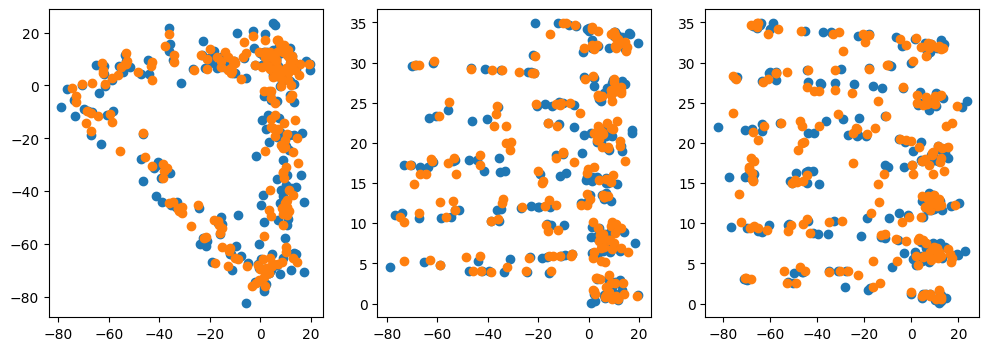

In [38]:
plt.figure(1,figsize=(12,4))
plt.subplot(131)
plt.scatter(x,y)
plt.scatter(y_pred[:,0],y_pred[:,1])
plt.subplot(132)
plt.scatter(x,z)
plt.scatter(y_pred[:,0],y_pred[:,2])
plt.subplot(133)
plt.scatter(y,z)
plt.scatter(y_pred[:,1],y_pred[:,2])